In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
data = pd.read_csv('stringed_survey.csv')

# 1. Generate Association Rules from Purchasing Factors

In [3]:
factors_data = [[]] * len(data['FactorsPurchase'])

for i in range(len(data['FactorsPurchase'])):
    if data['FactorsPurchase'][i] is not np.nan:
        factors_data[i] = data['FactorsPurchase'][i].split(';')
    else:
        factors_data[i] = []

te = TransactionEncoder()
te_ary = te.fit(factors_data).transform(factors_data)
factors_df = pd.DataFrame(te_ary, columns=te.columns_)

### Generate frequent itemsets with minimum support of 50%

In [4]:
frequent_itemsets = apriori(factors_df, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.60,(Aesthetics)
1,0.60,(Brand name)
2,0.68,(Functionality)
3,0.90,(Price)
4,0.50,(Size)
5,0.64,(Technological features)
6,0.56,"(Price, Aesthetics)"
7,0.56,"(Brand name, Price)"
8,0.62,"(Functionality, Price)"
9,0.50,"(Functionality, Technological features)"


### Generate association rules with minimum confidence of 75%

In [5]:
factors_association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.75)
factors_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Aesthetics),(Price),0.60,0.90,0.56,0.933333,1.037037,0.0200,1.500000
1,(Brand name),(Price),0.60,0.90,0.56,0.933333,1.037037,0.0200,1.500000
2,(Functionality),(Price),0.68,0.90,0.62,0.911765,1.013072,0.0080,1.133333
3,(Technological features),(Functionality),0.64,0.68,0.50,0.781250,1.148897,0.0648,1.462857
4,(Technological features),(Price),0.64,0.90,0.58,0.906250,1.006944,0.0040,1.066667


# 2. Generate Association Rules from Exterior Components

In [6]:
exterior_data = [[]] * len(data['ExteriorComponents'])

for i in range(len(data['ExteriorComponents'])):
    if data['ExteriorComponents'][i] is not np.nan:
        exterior_data[i] = data['ExteriorComponents'][i].split(';')
    else:
        exterior_data[i] = []

te = TransactionEncoder()
te_ary = te.fit(exterior_data).transform(exterior_data)
exterior_df = pd.DataFrame(te_ary, columns=te.columns_)

### Generate frequent itemsets with minimum support of 25%

In [7]:
frequent_itemsets = apriori(exterior_df, min_support=0.25, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.42,(Bumpers)
1,0.36,(Grilles)
2,0.44,(Headlights)
3,0.32,(Side mirrors)
4,0.66,(Wheels)
5,0.34,"(Headlights, Wheels)"


### Generate association rules with minimum confidence of 75%

In [8]:
exterior_association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.75)
exterior_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Headlights),(Wheels),0.44,0.66,0.34,0.772727,1.170799,0.0496,1.496


# 3. Generate Association Rules from Interior Components

In [9]:
interior_data = [[]] * len(data['InteriorComponents'])

for i in range(len(data['InteriorComponents'])):
    if data['InteriorComponents'][i] is not np.nan:
        interior_data[i] = data['InteriorComponents'][i].split(';')
    else:
        interior_data[i] = []

te = TransactionEncoder()
te_ary = te.fit(interior_data).transform(interior_data)
interior_df = pd.DataFrame(te_ary, columns=te.columns_)

### Generate frequent itemsets with minimum support of 25%

In [10]:
frequent_itemsets = apriori(interior_df, min_support=0.25, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.48,(Centre compartment)
1,0.84,(Dashboard)
2,0.36,(Door handles)
3,0.60,(Steering wheel)
4,0.42,"(Centre compartment, Dashboard)"
5,0.32,"(Centre compartment, Steering wheel)"
6,0.30,"(Dashboard, Door handles)"
7,0.48,"(Dashboard, Steering wheel)"
8,0.28,"(Door handles, Steering wheel)"
9,0.28,"(Centre compartment, Dashboard, Steering wheel)"


### Generate association rules with minimum confidence of 75%

In [11]:
interior_association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.75)
interior_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Centre compartment),(Dashboard),0.48,0.84,0.42,0.875000,1.041667,0.0168,1.28
1,(Door handles),(Dashboard),0.36,0.84,0.30,0.833333,0.992063,-0.0024,0.96
2,(Steering wheel),(Dashboard),0.60,0.84,0.48,0.800000,0.952381,-0.0240,0.80
3,(Door handles),(Steering wheel),0.36,0.60,0.28,0.777778,1.296296,0.0640,1.80
4,"(Centre compartment, Steering wheel)",(Dashboard),0.32,0.84,0.28,0.875000,1.041667,0.0112,1.28


# 4. Effect of Category on Components to Customize

### For exterior components

Text(0.5, 0.98, 'Effect of Category on Exterior Components to Customize')

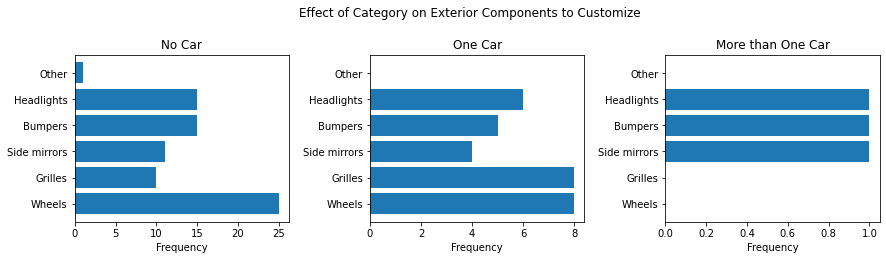

In [128]:
fig, ax = plt.subplots(1,3, figsize=(13,4))
fig.tight_layout(pad=5.0)

category_list = ['Do not own a car, but planning to purchase in future', 'Own a car', 'Own more than one car']
dict0 = {}
dict1 = {}
dict2 = {}
dict_list = [dict0, dict1, dict2]
for dictx in dict_list:
    dictx['Wheels'] = 0
    dictx['Grilles'] = 0
    dictx['Side mirrors'] = 0
    dictx['Bumpers'] = 0
    dictx['Headlights'] = 0
    dictx['add body kit and change the exhaust and tune the engine'] = 0

for i in range(len(category_list)):
    for exteriors in data['ExteriorComponents'][data['Category']==category_list[i]]:
        if exteriors is not np.nan:
            for exterior in exteriors.split(';'):
                dict_list[i][exterior] += 1
    
    dict_list[i]['Other'] = dict_list[i]['add body kit and change the exhaust and tune the engine']
    del dict_list[i]['add body kit and change the exhaust and tune the engine']
    
    exteriors = list(dict_list[i].keys())
    frequencies = list(dict_list[i].values())
    
    ax[i].barh(exteriors, frequencies)
    ax[i].set_xlabel('Frequency')
    
ax[0].set_title('No Car')
ax[1].set_title('One Car')
ax[2].set_title('More than One Car')
fig.suptitle('Effect of Category on Exterior Components to Customize')

### For interior components

Text(0.5, 0.98, 'Effect of Category on Interior Components to Customize')

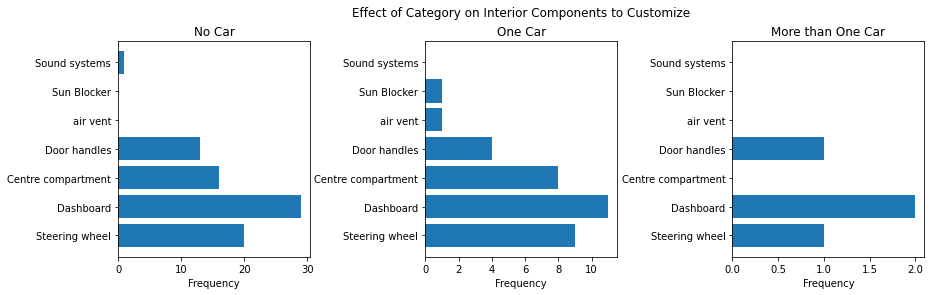

In [126]:
fig, ax = plt.subplots(1,3, figsize=(14,6))
# fig.tight_layout(pad=9.0)
plt.subplots_adjust(left=0.1,
                    bottom=0.4,
                    right=0.9,
                    top=0.9,
                    wspace=0.6,
                    hspace=0.4)

category_list = ['Do not own a car, but planning to purchase in future', 'Own a car', 'Own more than one car']
dict0 = {}
dict1 = {}
dict2 = {}
dict_list = [dict0, dict1, dict2]
for dictx in dict_list:
    dictx['Steering wheel'] = 0
    dictx['Dashboard'] = 0
    dictx['Centre compartment'] = 0
    dictx['Sun blocker for front passengers'] = 0
    dictx['Door handles'] = 0
    dictx['Music Player and sound systems'] = 0
    dictx['air vent'] = 0

for i in range(len(category_list)):
    for interiors in data['InteriorComponents'][data['Category']==category_list[i]]:
        if interiors is not np.nan:
            for interior in interiors.split(';'):
                dict_list[i][interior] += 1
            
    dict_list[i]['Sun Blocker'] = dict_list[i]['Sun blocker for front passengers']
    del dict_list[i]['Sun blocker for front passengers']
    
    dict_list[i]['Sound systems'] = dict_list[i]['Music Player and sound systems']
    del dict_list[i]['Music Player and sound systems']
    
    interiors = list(dict_list[i].keys())
    frequencies = list(dict_list[i].values())
    
    ax[i].barh(interiors, frequencies)
    ax[i].set_xlabel('Frequency')
    
ax[0].set_title('No Car')
ax[1].set_title('One Car')
ax[2].set_title('More than One Car')
fig.suptitle('Effect of Category on Interior Components to Customize')